# Live sample plots

This notebook illustrates how we can have live sample plots using the `live_traceplot` function with an `iter_sample` generator. It is based on the "Coal mining disasters" case study in the [Getting started notebook](https://github.com/pymc-devs/pymc3/blob/master/docs/source/notebooks/getting_started.ipynb).

In [6]:
import numpy as np
import pymc3 as pm
from pymc3 import Model, Exponential, DiscreteUniform, Poisson
from pymc3.math import switch

%matplotlib notebook

In [7]:
disaster_data = np.ma.masked_values([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                            3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                            2, 2, 3, 4, 2, 1, 3, -999, 2, 1, 1, 1, 1, 3, 0, 0,
                            1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                            0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                            3, 3, 1, -999, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                            0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], value=-999)
year = np.arange(1851, 1962)

if False:
    plt.plot(year, disaster_data, 'o', markersize=8);
    plt.ylabel("Disaster count")
    plt.xlabel("Year")

In [8]:
with Model() as disaster_model:

    switchpoint = DiscreteUniform('switchpoint', lower=year.min(), upper=year.max(), testval=1900)

    # Priors for pre- and post-switch rates number of disasters
    early_rate = Exponential('early_rate', 1)
    late_rate = Exponential('late_rate', 1)

    # Allocate appropriate Poisson rates to years before and after current
    rate = switch(switchpoint >= year, early_rate, late_rate)

    disasters = Poisson('disasters', rate, observed=disaster_data)

Assigned Metropolis to switchpoint
Assigned NUTS to early_rate_log_
Assigned NUTS to late_rate_log_
Assigned Metropolis to disasters_missing


<IPython.core.display.Javascript object>


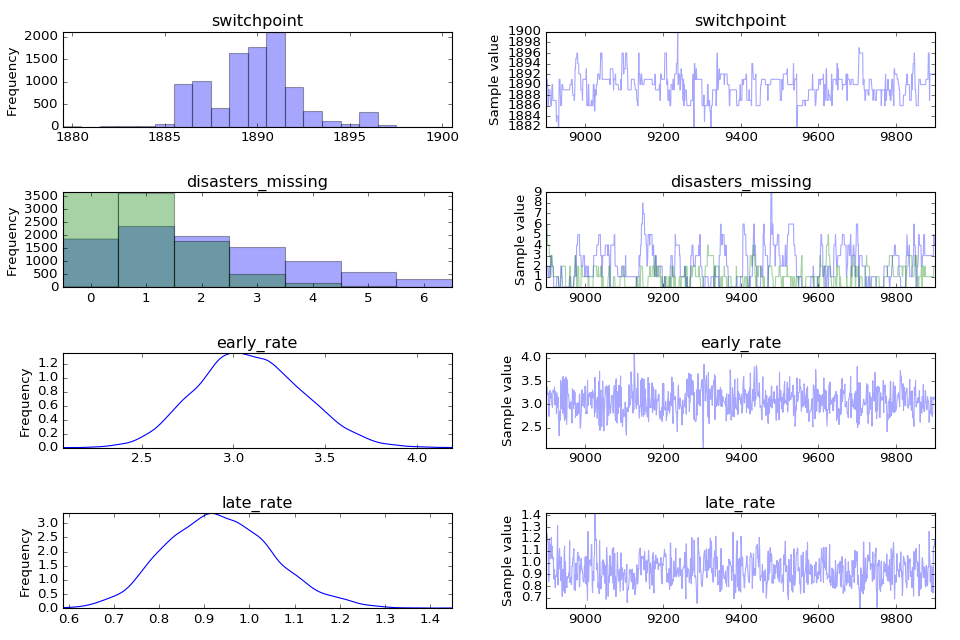

In [9]:
with disaster_model:
    step = pm.assign_step_methods(disaster_model)
    iter_sample = pm.iter_sample(10000, step)
    trace = pm.live_traceplot(iter_sample, skip_first=100, refresh_every=200, roll_over=1000)